In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# NPL
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kietpha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/kietpha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
df = pd.read_csv("../data/MRBEAST_video_data_UP.csv") 
df.shape

(761, 20)

In [13]:
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,jGAJCAuV3pQ,MrBeast,World’s Most Expensive Coffee,NaN,NaN,2023-10-19 17:00:03+00:00,20347931.0,1418403.0,NaN,9226.0,PT33S,hd,False,Thursday,0 days 00:00:33,0,69.707480,0.453412,29
1,1,c0v8OPItCOg,MrBeast,"$100,000,000 Bathroom",NaN,NaN,2023-10-17 17:00:00+00:00,33835270.0,2325420.0,NaN,8142.0,PT50S,hd,False,Tuesday,0 days 00:00:50,0,68.727692,0.240636,21
2,2,3ryID_SwU5E,MrBeast,"$1 Vs $100,000,000 House!",I can’t believe how expensive the last house i...,NaN,2023-10-14 16:00:00+00:00,107015289.0,4119510.0,NaN,121498.0,PT17M36S,hd,True,Saturday,0 days 00:17:36,0,38.494593,1.135333,25
3,3,IemzxkkzI5s,MrBeast,I Tipped A Pizza Delivery Driver A Car,NaN,NaN,2023-10-12 17:30:03+00:00,93048737.0,6723184.0,NaN,13569.0,PT52S,hd,False,Thursday,0 days 00:00:52,0,72.254436,0.145827,38
4,4,3OFj6l2tQ9s,MrBeast,World's Most Dangerous Trap!,I can’t believe how crazy the last room is\nGr...,NaN,2023-10-07 16:00:00+00:00,131231167.0,5107893.0,NaN,147172.0,PT19M48S,hd,True,Saturday,0 days 00:19:48,0,38.922865,1.121471,28


## EDA

### Best performing video

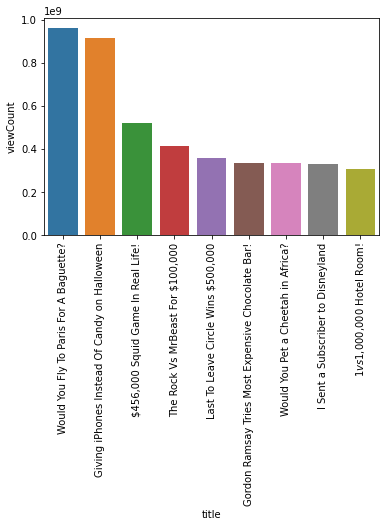

In [18]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### worst performing video

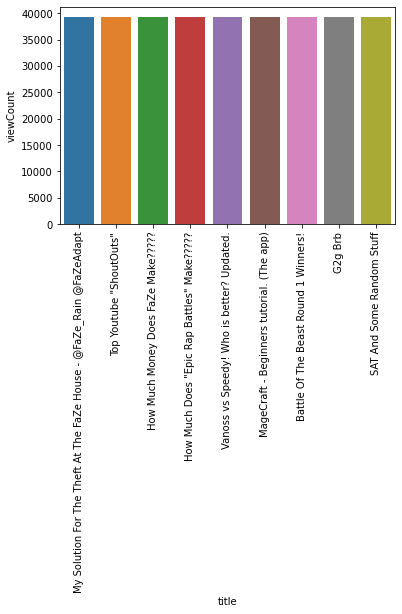

In [19]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### video distribution per video

<Axes: xlabel='channelTitle', ylabel='viewCount'>

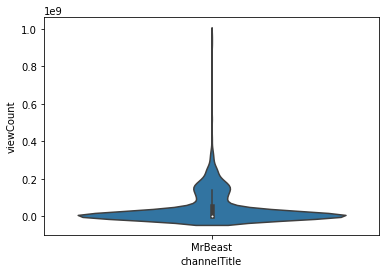

In [23]:
sns.violinplot(data=df, x='channelTitle', y='viewCount')

### views vs. likes and comments

<Axes: xlabel='likeCount', ylabel='viewCount'>

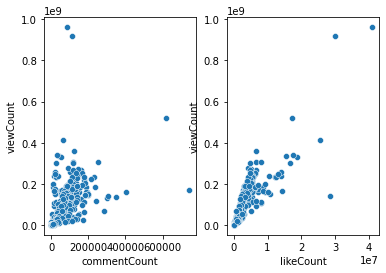

In [25]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df, x = 'commentCount', y='viewCount', ax = ax[0])
sns.scatterplot(data=df, x = 'likeCount', y='viewCount', ax = ax[1])

### video duration

<Axes: xlabel='durationSecs', ylabel='Count'>

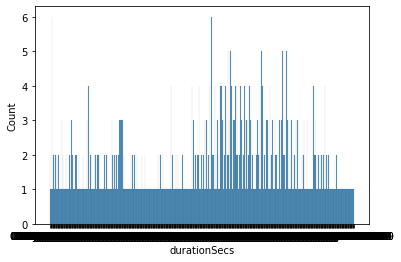

In [30]:
sns.histplot(data = df, x = 'durationSecs', bins=20)

### wordcloud for video title

In [35]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

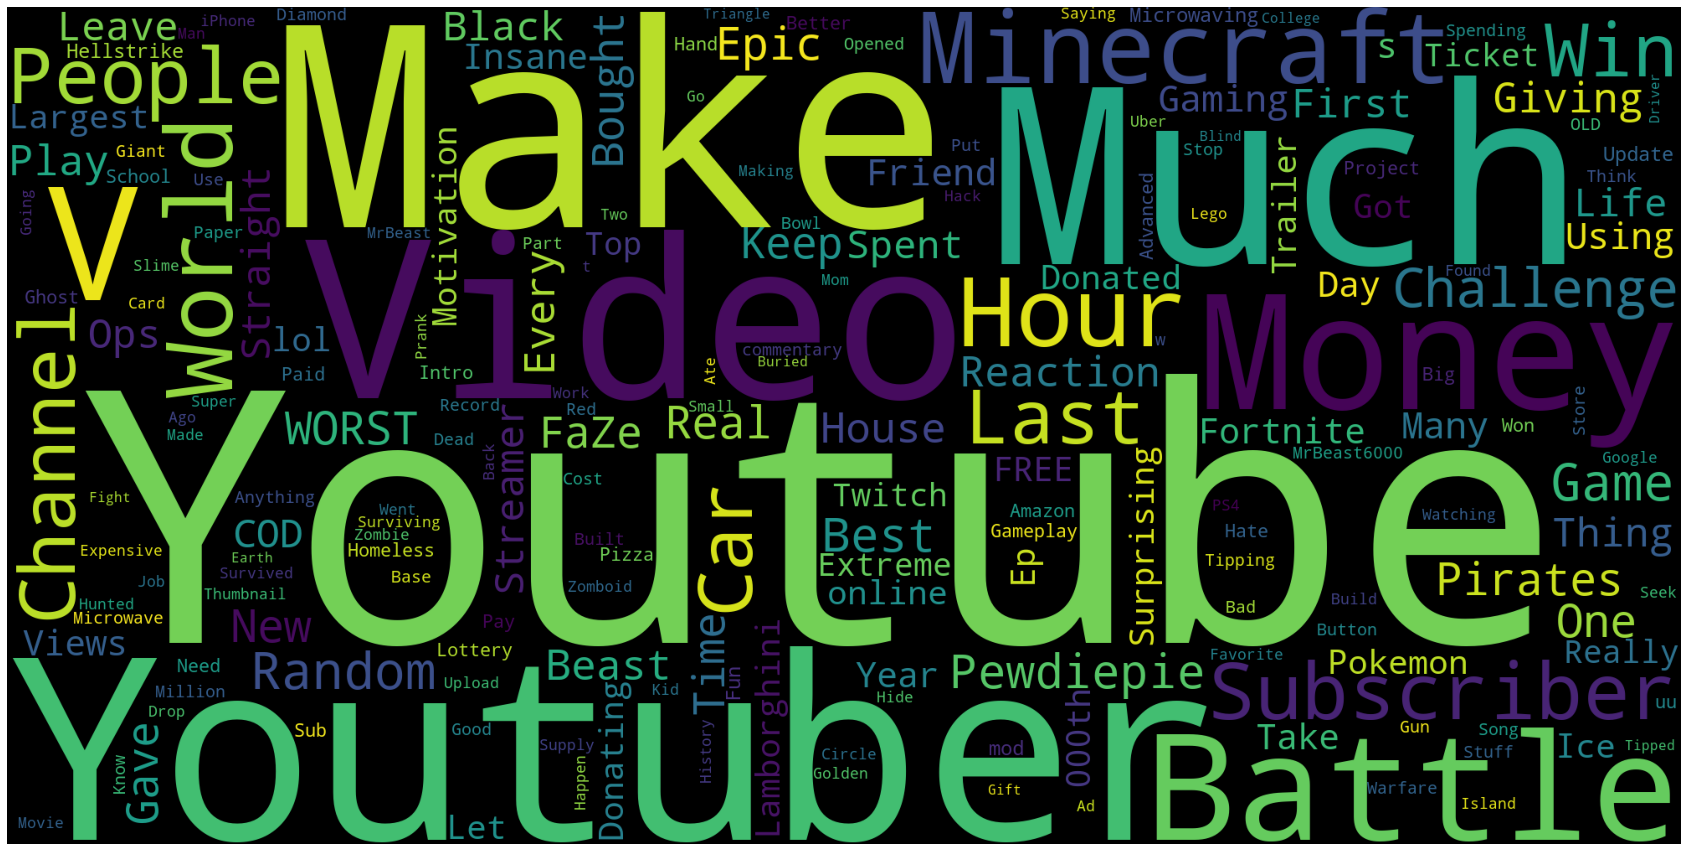

In [36]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### number of tags vs views

<Axes: xlabel='tagsCount', ylabel='viewCount'>

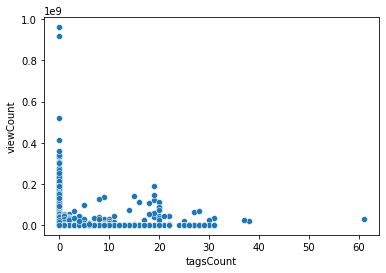

In [37]:
sns.scatterplot(data = df, x = "tagsCount", y = "viewCount")

### which days in the week are most videos uploaded?

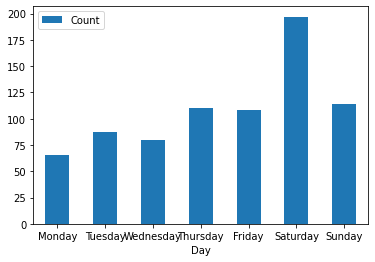

In [40]:
day_df = pd.DataFrame(df['pushblishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df.reset_index(inplace=True)
day_df.columns = ['Day', 'Count']

# Create a bar plot
ax = day_df.plot.bar(x='Day', y='Count', rot=0)

# Show the plot
plt.show()

### wordcloud for video comment

In [49]:
comments_df = pd.read_csv("data/MRBEAST_comments_data.csv")

stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

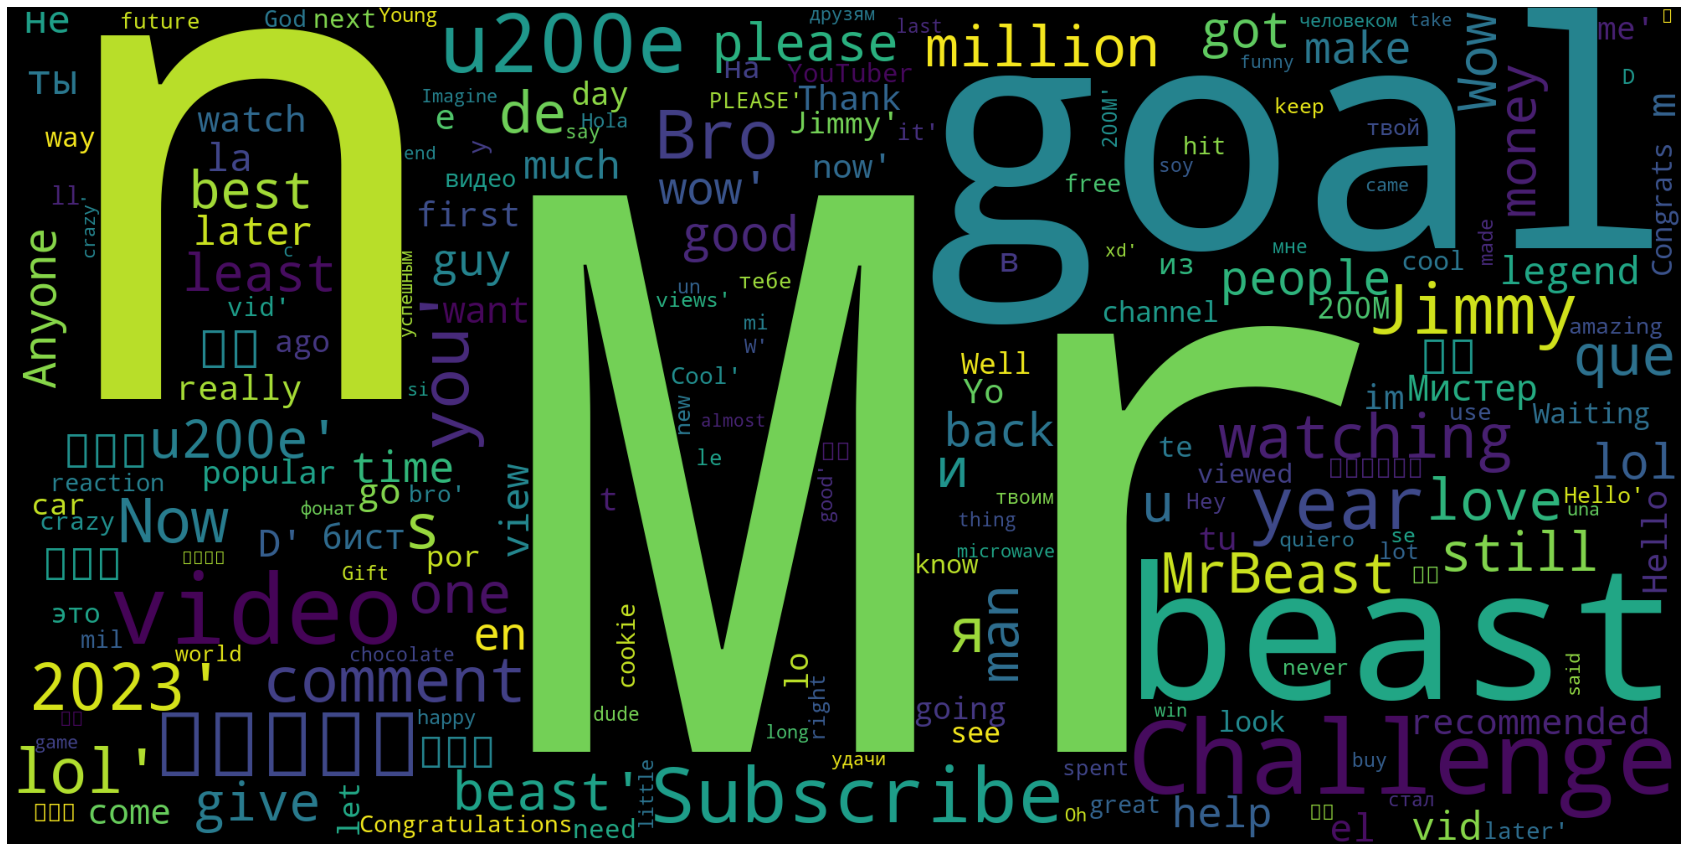

In [50]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)